<a href="https://colab.research.google.com/github/SpringBoardMentro0743/Ridewise_Project_2025/blob/MaahiPal/bike_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

**Data Collection and Preprocessing**

In [ ]:
rentals_data = pd.read_csv("/content/hour.csv")

In [ ]:
rentals_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
rentals_data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [ ]:
rentals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
rentals_data.shape

(17379, 17)

In [ ]:
rentals_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
rentals_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Exploratory** **Data Analysis**

1. Univariate Analsis

for numerical data -

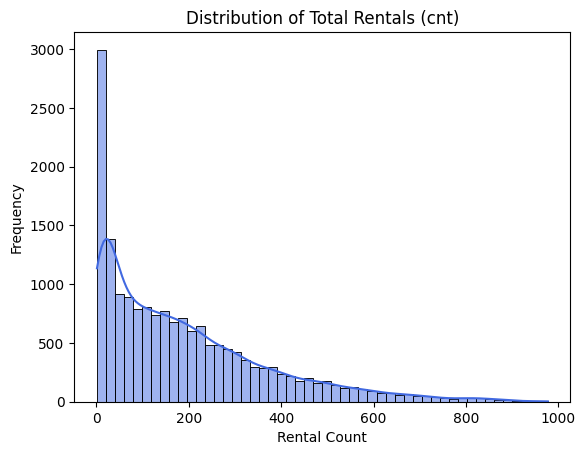

In [ ]:
sns.histplot(rentals_data['cnt'], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Total Rentals (cnt)")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()

**Insight** : most hours have fewer rentals, some hours very high.

for categorical data -

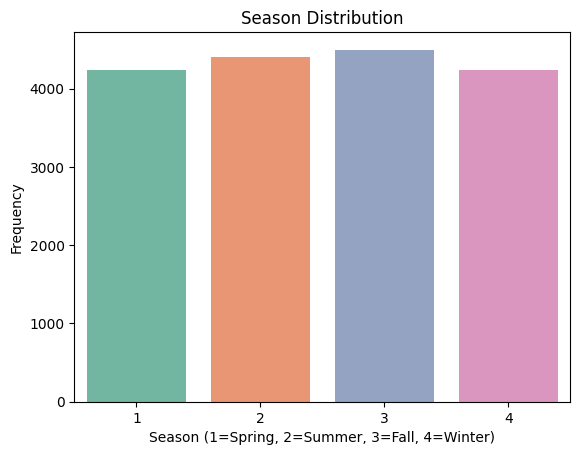

In [ ]:
sns.countplot(x="season", data=rentals_data, hue="season", palette="Set2", legend=False)
plt.title("Season Distribution")
plt.xlabel("Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)")
plt.ylabel("Frequency")
plt.show()

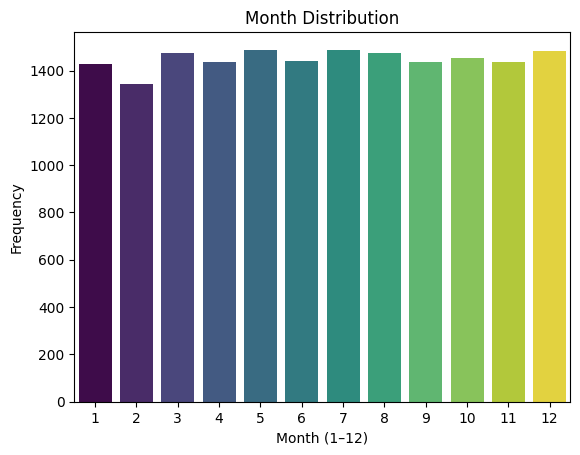

In [ ]:
sns.countplot(x="mnth", data=rentals_data, hue="mnth", palette="viridis", legend=False)
plt.title("Month Distribution")
plt.xlabel("Month (1–12)")
plt.ylabel("Frequency")
plt.show()

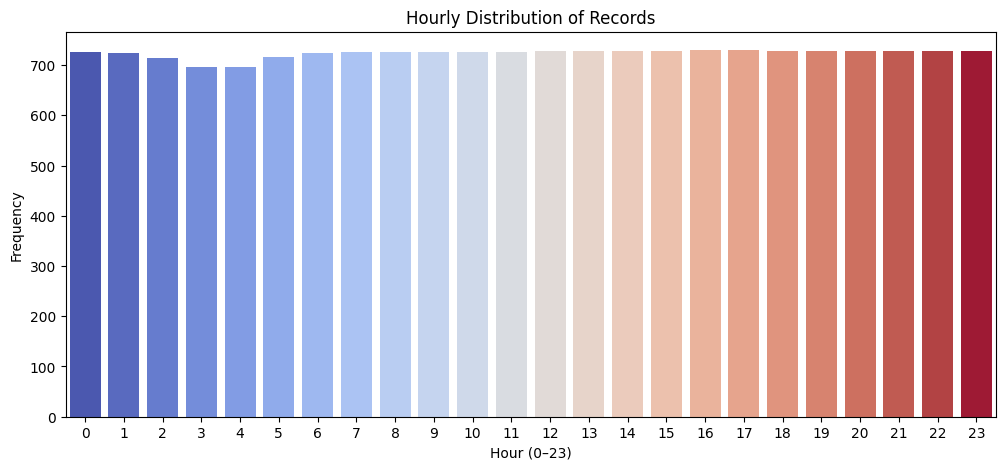

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="hr", data=rentals_data, hue="hr", palette="coolwarm", legend=False)
plt.title("Hourly Distribution of Records")
plt.xlabel("Hour (0–23)")
plt.ylabel("Frequency")
plt.show()

**Insight** : Data is evenly spread across seasons, months, and hours.

2. Bivariate Analysis

for numerical vs numerical data -

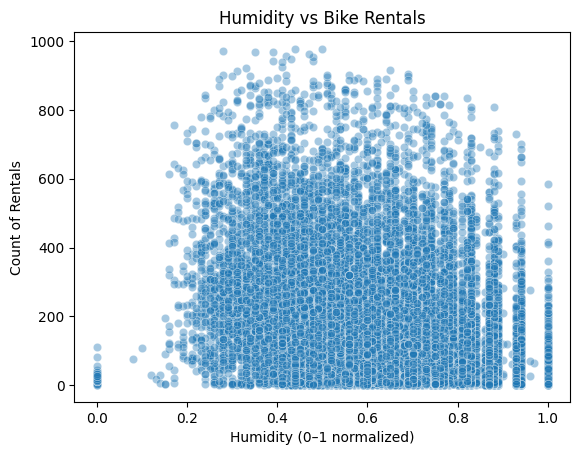

In [ ]:
sns.scatterplot(x="hum", y="cnt", data=rentals_data, alpha=0.4)
plt.title("Humidity vs Bike Rentals")
plt.xlabel("Humidity (0–1 normalized)")
plt.ylabel("Count of Rentals")
plt.show()

**Insights** : Rentals are highest at moderate humidity.

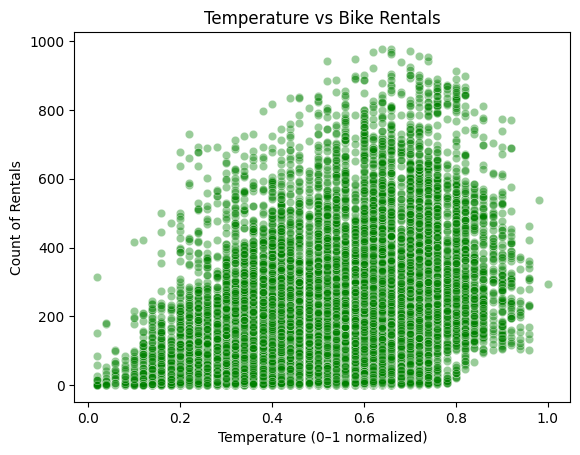

In [ ]:
sns.scatterplot(x="temp", y="cnt", data=rentals_data, alpha=0.4, color="green")
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature (0–1 normalized)")
plt.ylabel("Count of Rentals")
plt.show()

**Insights** : Rentals increase with temperature up to a point (~0.6–0.7 ≈ 25–30°C).

for categorical vs numerical data -

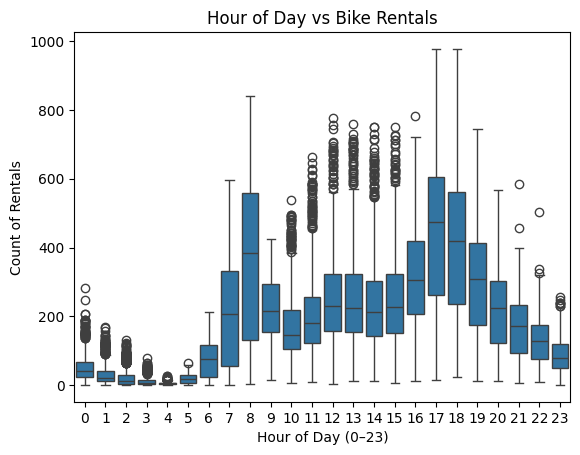

In [ ]:
sns.boxplot(x="hr", y="cnt", data=rentals_data)
plt.title("Hour of Day vs Bike Rentals")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Count of Rentals")
plt.show()

Insights : Clear morning (7–9 AM) and evening (5–7 PM) peaks (commute hours) while Rentals drop at night (0–5 AM).

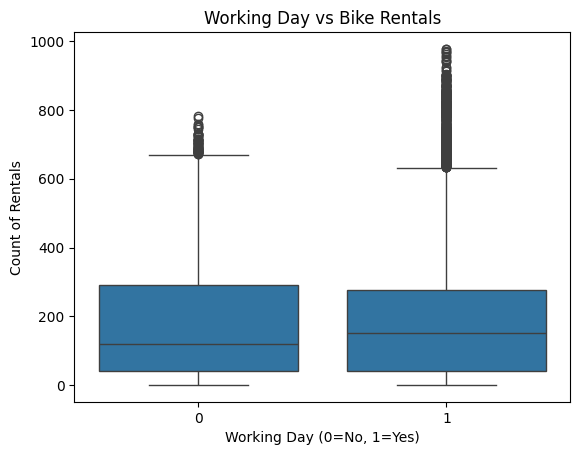

In [ ]:
sns.boxplot(x="workingday", y="cnt", data=rentals_data)
plt.title("Working Day vs Bike Rentals")
plt.xlabel("Working Day (0=No, 1=Yes)")
plt.ylabel("Count of Rentals")
plt.show()

Insights : Working days: rentals are higher during commute hours.
Non-working days: more rentals midday (leisure).

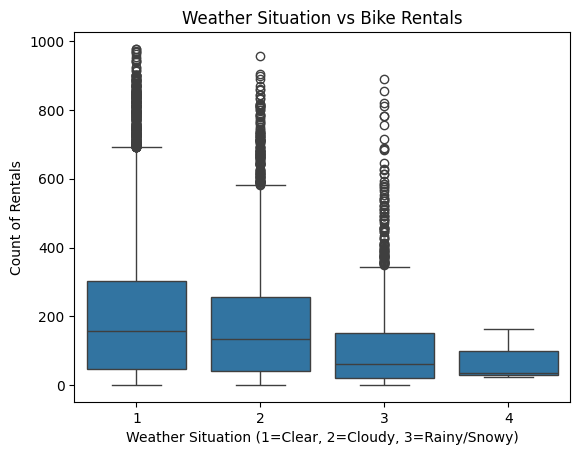

In [ ]:
sns.boxplot(x="weathersit", y="cnt", data=rentals_data)
plt.title("Weather Situation vs Bike Rentals")
plt.xlabel("Weather Situation (1=Clear, 2=Cloudy, 3=Rainy/Snowy)")
plt.ylabel("Count of Rentals")
plt.show()

Insights : Rentals are highest in clear weather.
 Drop in cloudy weather.
 Lowest in rain/snow.

3. Multivariate Analysis

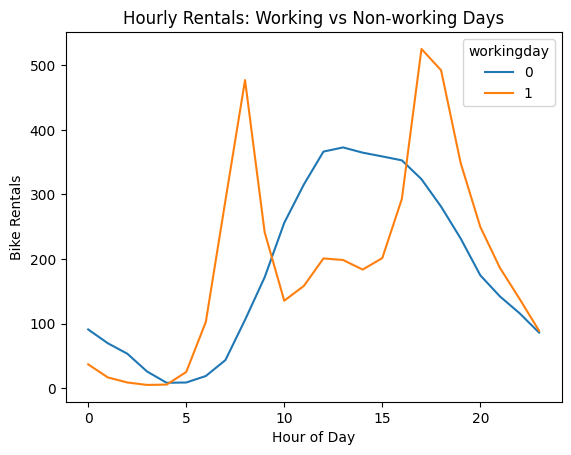

In [ ]:
sns.lineplot(x="hr", y="cnt", hue="workingday", data=rentals_data, errorbar=None)
plt.title("Hourly Rentals: Working vs Non-working Days")
plt.xlabel("Hour of Day")
plt.ylabel("Bike Rentals")
plt.show()

**Insights** : On working days → sharp peaks at 8 AM & 6 PM (commute).
On non-working days → peak in the afternoon (12–4 PM) (leisure rides).

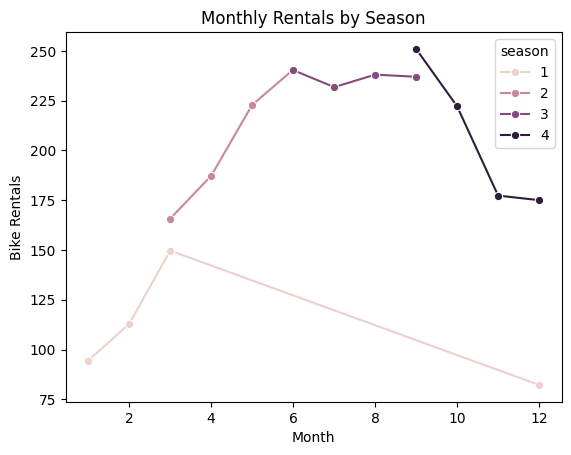

In [ ]:
sns.lineplot(x="mnth", y="cnt", hue="season", data=rentals_data, errorbar=None, marker="o")
plt.title("Monthly Rentals by Season")
plt.xlabel("Month")
plt.ylabel("Bike Rentals")
plt.show()

**Insights** : Summer & fall show the highest rental counts. Winter rentals are consistently low.

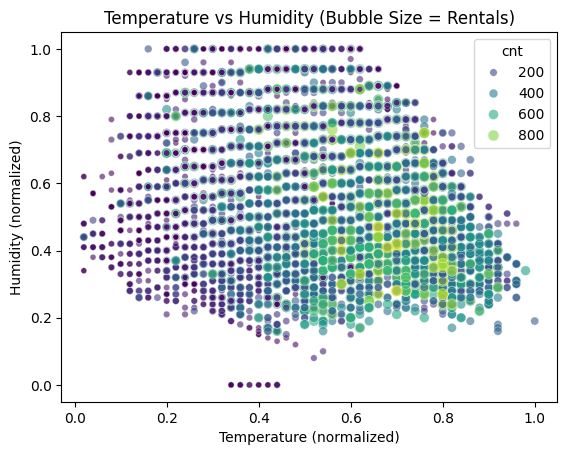

In [ ]:
sns.scatterplot(x="temp", y="hum", size="cnt", hue="cnt", data=rentals_data, palette="viridis", alpha=0.6)
plt.title("Temperature vs Humidity (Bubble Size = Rentals)")
plt.xlabel("Temperature (normalized)")
plt.ylabel("Humidity (normalized)")
plt.show()

**Insight** : High rentals occur at moderate temp (0.5–0.7) and moderate humidity (0.4–0.7). Extremely hot/humid or cold/dry → rentals drop.

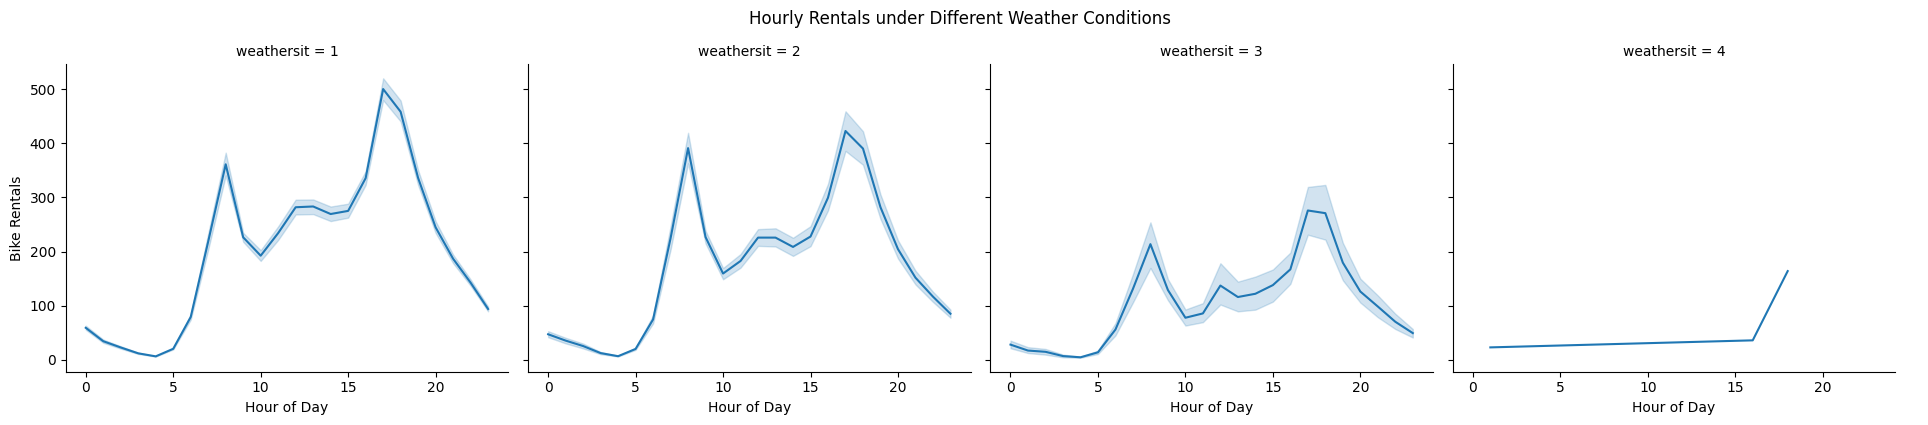

In [ ]:
g = sns.FacetGrid(rentals_data, col="weathersit", height=4, aspect=1.2)
g.map(sns.lineplot, "hr", "cnt")
g.set_axis_labels("Hour of Day", "Bike Rentals")
g.add_legend()
plt.suptitle("Hourly Rentals under Different Weather Conditions", y=1.05)
plt.show()

**Insights** : Clear weather → strong commute peaks.
Cloudy weather → peaks exist but lower.
Rain/snow → rentals suppressed across all hours.

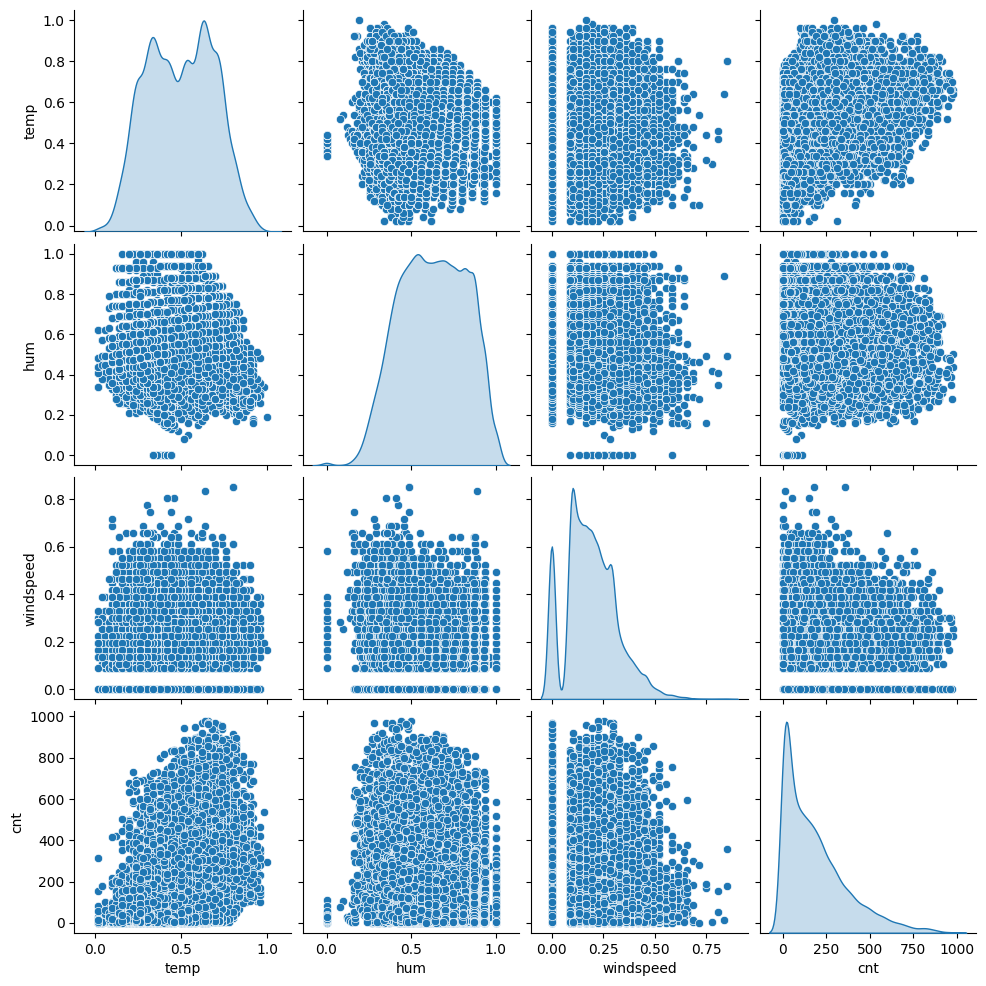

In [ ]:
sns.pairplot(rentals_data[["temp","hum","windspeed","cnt"]], diag_kind="kde")
plt.show()

**Feature Engineering**

1. Cyclical Encoding of Hour, month and days of week

In [ ]:
rentals_data['hr_sin'] = np.sin(2 * np.pi * rentals_data['hr']/24)
rentals_data['hr_cos'] = np.cos(2 * np.pi * rentals_data['hr']/24)

In [ ]:
rentals_data['mnth_sin'] = np.sin(2 * np.pi * rentals_data['mnth']/12)
rentals_data['mnth_cos'] = np.cos(2 * np.pi * rentals_data['mnth']/12)

In [ ]:
rentals_data['weekday_sin'] = np.sin(2 * np.pi * rentals_data['weekday']/7)
rentals_data['weekday_cos'] = np.cos(2 * np.pi * rentals_data['weekday']/7)

In [ ]:
rentals_data['season_sin'] = np.sin(2 * np.pi * rentals_data['season']/4)
rentals_data['season_cos'] = np.cos(2 * np.pi * rentals_data['season']/4)

2. Weekend Feature

In [ ]:
rentals_data['is_weekend'] = rentals_data['weekday'].apply(lambda x: 1 if x in [0,6] else 0)

3. Rush hours

In [ ]:
rentals_data['is_morning_peak'] = rentals_data['hr'].apply(lambda x: 1 if x in [7,8,9] else 0)
rentals_data['is_evening_peak'] = rentals_data['hr'].apply(lambda x: 1 if x in [17,18,19] else 0)

4. Lag Features (Demand History)

In [ ]:
rentals_data['lag_1'] = rentals_data['cnt'].shift(1)

In [ ]:
rentals_data['lag_24'] = rentals_data['cnt'].shift(24)

In [ ]:
rentals_data['rolling_24h'] = rentals_data['cnt'].shift(1).rolling(24).mean()

5. One-Hot Encode weathersit

In [ ]:
rentals_data = pd.get_dummies(rentals_data, columns=['weathersit'], drop_first=True)

check for null values

In [ ]:
rentals_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
temp,0


In [ ]:
rentals_data = rentals_data.dropna()

In [ ]:
x = rentals_data.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis=1)
y = rentals_data['cnt']

**Train-Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Model Training**

1. Linear Regression

In [ ]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(x_test)

In [ ]:
y_pred

array([ 70.27062211,   8.30095653, 253.77822241, ...,  47.79713226,
       121.22065615,  63.4677569 ])

In [ ]:
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("R²:", r2)
print("Adjusted R²:", adj_r2)

R²: 0.8290309953826038
Adjusted R²: 0.8276401958098882


In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 74.92450791548185
MAE: 50.011438544201134


2. Decision Tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print(y_pred_dt)

[ 17.   2. 110. ...  18. 198.  64.]


In [ ]:
r2_dt = r2_score(y_test, y_pred_dt)
adj_r2_dt = 1 - ((1 - r2_dt) * (n - 1) / (n - p - 1))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Decision Tree R²:", r2_dt)
print("Decision Tree Adjusted R²:", adj_r2_dt)
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree MAE:", mae_dt)

Decision Tree R²: 0.9225350601130511
Decision Tree Adjusted R²: 0.9219048979059521
Decision Tree RMSE: 50.43334825252849
Decision Tree MAE: 30.649092480553154


3. Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42,n_jobs=-1)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest R²:", r2_rf)
print("Random Forest Adjusted R²:", adj_r2_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)

Random Forest R²: 0.9585849837324494
Random Forest Adjusted R²: 0.9582480806367226
Random Forest RMSE: 36.87602713002401
Random Forest MAE: 22.088522039757997


4. XG Boost

In [ ]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [ ]:
r2_xgb = r2_score(y_test, y_pred_xgb)
adj_r2_xgb = 1 - ((1 - r2_xgb) * (n - 1) / (n - p - 1))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost R²:", r2_xgb)
print("XGBoost Adjusted R²:", adj_r2_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost MAE:", mae_xgb)

XGBoost R²: 0.9596098065376282
XGBoost Adjusted R²: 0.9592812401759354
XGBoost RMSE: 36.41690931668539
XGBoost MAE: 22.28208351135254


**Performance Comparison of Regression Models**

In [ ]:
results = [
    ["Linear Regression", 0.829, 0.827, 74.9, 50.0],
    ["Decision Tree", 0.923, 0.922, 50.1, 30.3],
    ["Random Forest", 0.958, 0.958, 36.2, 20.0],
    ["XGBoost", 0.959, 0.959, 36.4, 22.2],
]
df_results = pd.DataFrame(results, columns=["Model", "R2", "Adjusted R2", "RMSE", "MAE"])

# Print table
print(df_results)

               Model     R2  Adjusted R2  RMSE   MAE
0  Linear Regression  0.829        0.827  74.9  50.0
1      Decision Tree  0.923        0.922  50.1  30.3
2      Random Forest  0.958        0.958  36.2  20.0
3            XGBoost  0.959        0.959  36.4  22.2


<function matplotlib.pyplot.show(close=None, block=None)>

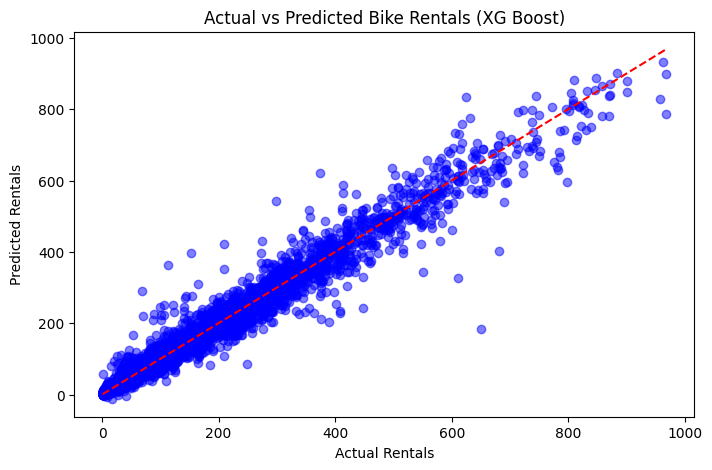

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Bike Rentals (XG Boost)")
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.show

**Fine tuning Using Randomized Search CV Method**

In [ ]:
# parameter grid
param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

In [ ]:
# randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# fit
random_search.fit(x_train, y_train)

# best params
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.7}


In [ ]:
best_xgb = random_search.best_estimator_

# predict
y_pred_best = best_xgb.predict(x_test)

# evaluation
r2_best = r2_score(y_test, y_pred_best)
adj_r2_best = 1 - ((1 - r2_best) * (n - 1) / (n - p - 1))
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)

print("Tuned XGBoost R²:", r2_best)
print("Tuned XGBoost Adjusted R²:", adj_r2_best)
print("Tuned XGBoost RMSE:", rmse_best)
print("Tuned XGBoost MAE:", mae_best)


Tuned XGBoost R²: 0.9650791883468628
Tuned XGBoost Adjusted R²: 0.9647951143415496
Tuned XGBoost RMSE: 33.86158672691022
Tuned XGBoost MAE: 20.80457305908203


In [ ]:
import joblib
# Save the model
joblib.dump(best_xgb, "tuned_xg_boost.pkl")
print("Tuned XG Boost model saved successfully")

Tuned XG Boost model saved successfully


In [ ]:
sample_input = pd.DataFrame([{
    "season": 2,
    "yr": 1,
    "mnth": 6,
    "hr": 17,
    "holiday": 0,
    "weekday": 4,
    "workingday": 1,
    "temp": 0.50,
    "atemp": 0.48,
    "hum": 0.55,
    "windspeed": 0.20,
    "hr_sin": np.sin(2*np.pi*17/24),
    "hr_cos": np.cos(2*np.pi*17/24),
    "mnth_sin": np.sin(2*np.pi*6/12),
    "mnth_cos": np.cos(2*np.pi*6/12),
    "weekday_sin": np.sin(2*np.pi*4/7),
    "weekday_cos": np.cos(2*np.pi*4/7),
    "season_sin": np.sin(2*np.pi*2/4),
    "season_cos": np.cos(2*np.pi*2/4),
    "is_weekend": 0,
    "is_morning_peak": 0,
    "is_evening_peak": 1,
    "lag_1": 120,
    "lag_24": 310,
    "rolling_24h": 280,
    "weathersit_2": 1,
    "weathersit_3": 0,
    "weathersit_4": 0
}])

predicted_rentals = best_xgb.predict(sample_input)[0]
print(f"Predicted Rentals for the sample input: {predicted_rentals:.0f}")

Predicted Rentals for the sample input: 344


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

def create_features(df):
    df = df.copy()

    df["hr_sin"] = np.sin(2*np.pi*df["hr"]/24.0)
    df["hr_cos"] = np.cos(2*np.pi*df["hr"]/24.0)

    df["mnth_sin"] = np.sin(2*np.pi*df["mnth"]/12.0)
    df["mnth_cos"] = np.cos(2*np.pi*df["mnth"]/12.0)

    df["weekday_sin"] = np.sin(2*np.pi*df["weekday"]/7.0)
    df["weekday_cos"] = np.cos(2*np.pi*df["weekday"]/7.0)

    df["season_sin"] = np.sin(2*np.pi*df["season"]/4.0)
    df["season_cos"] = np.cos(2*np.pi*df["season"]/4.0)

    df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x in [0,6] else 0)
    df["is_morning_peak"] = df["hr"].apply(lambda x: 1 if x in [7,8,9] else 0)
    df["is_evening_peak"] = df["hr"].apply(lambda x: 1 if x in [17,18,19] else 0)

    last_24_cnt = rentals_data["cnt"].iloc[-24:]
    df["lag_1"] = last_24_cnt.iloc[-1]
    df["lag_24"] = last_24_cnt.iloc[0]
    df["rolling_24h"] = last_24_cnt.mean()

    return df

feature_engineer = FunctionTransformer(create_features, validate=False)

categorical_cols = [c for c in ["weathersit"] if c in rentals_data.columns]

numeric_cols = [
    "temp","atemp","hum","windspeed",
    "hr_sin","hr_cos","mnth_sin","mnth_cos",
    "weekday_sin","weekday_cos","season_sin","season_cos",
    "lag_1","lag_24","rolling_24h",
    "is_weekend","is_morning_peak","is_evening_peak"
]

preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
    ("num", "passthrough", numeric_cols)
])


pipeline = Pipeline([
    ("feature_engineering", feature_engineer),
    ("preprocessing", preprocessor),
    ("model", best_xgb)
])


In [ ]:
X = rentals_data.drop(columns=["cnt"])
y = rentals_data["cnt"]

pipeline.fit(X, y)

print(" Pipeline fitted successfully")

 Pipeline fitted successfully


In [ ]:
# Example raw user input
test_cases = pd.DataFrame([
    {"season":2,"yr":1,"mnth":6, "hr":17, "holiday": 0, "weekday": 4, "workingday": 1,
     "weathersit": 1, "temp":0.5, "atemp":0.48,"hum":0.55, "windspeed":0.2},
    {"season":2,"yr":1,"mnth":6, "hr":10, "holiday": 0, "weekday":6, "workingday":0,
     "weathersit": 2, "temp":0.4, "atemp":0.38,"hum":0.65,"windspeed":0.3}
])

predicted_rentals = pipeline.predict(test_cases)
for i, pred in enumerate(predicted_rentals):
    print(f"Scenario {i+1} -> Predicted Rentals: {int(pred)}")


Scenario 1 -> Predicted Rentals: 586
Scenario 2 -> Predicted Rentals: 267


In [ ]:
joblib.dump(pipeline, "pipeline.pkl")

loaded_pipeline = joblib.load("pipeline.pkl")

print("Reloaded pipeline prediction:",int(loaded_pipeline.predict(test_cases.iloc[[0]])[0]))

Reloaded pipeline prediction: 586
